#  load taxi data and handle the dbf file

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import copy
import scipy.integrate as spi
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

<AxesSubplot:>

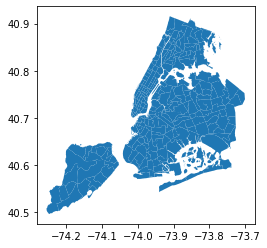

In [2]:
gdf=gpd.read_file(r'C:\jupyter notebook\PAPER\data for taxi\dbf_file\taxi_zones.dbf')
gdf=gdf.to_crs(crs='EPSG:4326')
gdf['check']=gdf['geometry'].centroid
gdf=gdf[(gdf['LocationID']!=103)&(gdf['LocationID']!=104)&(gdf['LocationID']!=1)]
gdf.plot()

<AxesSubplot:>

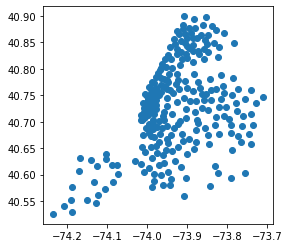

In [3]:
gdf=gdf.set_geometry('check')
gdf.plot()

In [4]:
gdf1=gdf[['LocationID','check']]
gdf1.columns=['LocationID','geometry']
gdf1[['LON','Lat','LON1','Lat1']]=gdf1['geometry'].bounds
gdf1

,LocationID,geometry,LON,Lat,LON1,Lat1
1,2,POINT (-73.83130 40.61675),-73.831299,40.616745,-73.831299,40.616745
2,3,POINT (-73.84742 40.86447),-73.847422,40.864474,-73.847422,40.864474
3,4,POINT (-73.97697 40.72375),-73.976968,40.723752,-73.976968,40.723752
4,5,POINT (-74.18848 40.55266),-74.188484,40.552659,-74.188484,40.552659
5,6,POINT (-74.07177 40.60032),-74.071771,40.600324,-74.071771,40.600324
...,...,...,...,...,...,...
258,259,POINT (-73.85222 40.89793),-73.852215,40.897932,-73.852215,40.897932
259,260,POINT (-73.90631 40.74423),-73.906306,40.744235,-73.906306,40.744235
260,261,POINT (-74.01302 40.70914),-74.013023,40.709139,-74.013023,40.709139
261,262,POINT (-73.94651 40.77593),-73.946510,40.775932,-73.946510,40.775932


In [5]:
df_need=gdf1[['LocationID','LON','Lat']]
df_need=pd.DataFrame(df_need)
df_need.columns=['LocationID','lon','lat']
df_need

,LocationID,lon,lat
1,2,-73.831299,40.616745
2,3,-73.847422,40.864474
3,4,-73.976968,40.723752
4,5,-74.188484,40.552659
5,6,-74.071771,40.600324
...,...,...,...
258,259,-73.852215,40.897932
259,260,-73.906306,40.744235
260,261,-74.013023,40.709139
261,262,-73.946510,40.775932


In [6]:
# load taxi data
data_taxi_fhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhv_tripdata_2020-03.csv')
data_taxi_fhvhv=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\fhvhv_tripdata_2020-03.csv')
data_taxi_green=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\green_tripdata_2020-03.csv')
data_taxi_yellow=pd.read_csv(r'C:\jupyter notebook\PAPER\data for taxi\yellow_tripdata_2020-03.csv')

data_taxi=pd.concat((data_taxi_fhv[['PULocationID','DOLocationID']],data_taxi_fhvhv[['PULocationID','DOLocationID']],data_taxi_green[['PULocationID','DOLocationID']],data_taxi_yellow[['PULocationID','DOLocationID']]),axis=0)
data_taxi=data_taxi.dropna().astype(int)
data_taxi['num']=1
data_taxi=data_taxi.reset_index(drop=True)
data_taxi 

,PULocationID,DOLocationID,num
0,264,264,1
1,264,264,1
2,264,264,1
3,264,264,1
4,264,264,1
...,...,...,...
17892296,137,87,1
17892297,137,71,1
17892298,137,32,1
17892299,137,159,1


In [7]:
df1=data_taxi_fhv[['pickup_datetime']]
df1.columns=['time']

df2=data_taxi_fhvhv[['pickup_datetime']]
df2.columns=['time']

df3=data_taxi_green[['lpep_pickup_datetime']]
df3.columns=['time']

df4=data_taxi_yellow[['tpep_pickup_datetime']]
df4.columns=['time']

df_time=pd.concat((df1,df2,df3,df4),axis=0)
df_time['date']=df_time['time'].apply(lambda r:r.split(' ')[0])
df_time['month']=df_time['date'].apply(lambda r:r.split('-')[0]+r.split('-')[1])
df_time=df_time[df_time['month']=='202003']

df_num=df_time.groupby('date',as_index=False).count()
df_num

,date,time,month
0,2020-03-01,1026684,1026684
1,2020-03-02,929444,929444
2,2020-03-03,1012678,1012678
3,2020-03-04,1031024,1031024
4,2020-03-05,1070034,1070034
5,2020-03-06,1207818,1207818
6,2020-03-07,1164671,1164671
7,2020-03-08,955922,955922
8,2020-03-09,889027,889027
9,2020-03-10,893167,893167


In [8]:
data_OD=data_taxi.groupby(['PULocationID','DOLocationID'],as_index=False).sum()#.unstack().fillna(0).astype(int)
data_OD

,PULocationID,DOLocationID,num
0,1,1,318
1,1,4,6
2,1,5,9
3,1,6,2
4,1,7,2
...,...,...,...
57829,265,261,13
57830,265,262,5
57831,265,263,4
57832,265,264,194


In [9]:
data_OD.columns=['LocationID','ENDID','num']
DF=pd.merge(data_OD,df_need)
DF.columns=['STID','LocationID','num','slon','slat']
DF=pd.merge(DF,df_need)
DF

,STID,LocationID,num,slon,slat,lon,lat
0,2,26,1,-73.831299,40.616745,-73.988661,40.630950
1,3,26,3,-73.847422,40.864474,-73.988661,40.630950
2,4,26,22,-73.976968,40.723752,-73.988661,40.630950
3,5,26,3,-74.188484,40.552659,-73.988661,40.630950
4,6,26,21,-74.071771,40.600324,-73.988661,40.630950
...,...,...,...,...,...,...,...
56574,239,27,1,-73.978632,40.783961,-73.906908,40.559133
56575,249,27,1,-74.002875,40.734576,-73.906908,40.559133
56576,257,27,2,-73.977982,40.653612,-73.906908,40.559133
56577,263,27,1,-73.951010,40.778766,-73.906908,40.559133


In [10]:
DF=DF[['slon','slat','lon','lat','num']]
DF.columns=['slon','slat','elon','elat','count']
DF.to_csv('OD we need.csv')

# Calculate the steady-state dietribution vector

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import copy
import scipy.integrate as spi
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

data_taxi=pd.read_csv('data_taxi.csv')
data_zone=pd.read_csv('data_zone.csv')
data_taxi

,PULocationID,DOLocationID,num
0,55,170,1
1,170,170,1
2,55,170,1
3,55,126,1
4,55,55,1
...,...,...,...
16395289,134,86,1
16395290,134,70,1
16395291,134,31,1
16395292,134,156,1


In [12]:
data_OD=data_taxi.groupby(['PULocationID','DOLocationID']).sum().unstack().fillna(0).astype(int)
data_OD=data_OD.applymap(lambda x:x+1)   
data_OD=np.array(data_OD).tolist()  

In [13]:

M=260


P=copy.deepcopy(data_OD)
for i in range(0,len(data_OD)):
    for j in range(0,len(data_OD)):
        P[i][j]=data_OD[i][j]/sum(data_OD[i])



A=copy.deepcopy(P)
for i in range(0,M):
    for j in range(0,M):
        if(i==j):
            A[i][j]=1-A[i][j]
        else:
            A[i][j]=-A[i][j]

def get_reset(array):
    L=[]
    for i in range(len(array)):
        array_copy=copy.deepcopy(array)
        for x in range(len(array_copy)):
            array_copy[i][x]=0
        for y in range(len(array_copy)):
            array_copy[y][i]=0
        array_copy[i][i]=1
        L.append(np.linalg.det(array_copy))
    return L
KU=get_reset(A)
PI=KU/sum(KU)
PI

array([1.95978777e-05, 2.39818346e-03, 2.97564252e-03, 2.87385597e-04,
       5.68536924e-04, 9.23184193e-03, 4.70334671e-05, 8.37227015e-04,
       2.69038216e-03, 1.15517900e-03, 1.86163398e-04, 4.20632333e-03,
       5.20236647e-03, 7.00395754e-04, 1.86110452e-03, 8.43016786e-03,
       5.80830619e-03, 5.99980594e-04, 3.29817373e-03, 2.64533850e-03,
       3.38619358e-03, 1.73580194e-03, 1.98939347e-03, 4.29852617e-03,
       5.86893257e-03, 6.89430371e-05, 2.09148958e-03, 2.19798154e-03,
       6.33801738e-05, 4.19893509e-04, 2.89297840e-03, 3.91121275e-03,
       8.07203337e-04, 6.69074214e-03, 6.88176136e-03, 1.02561719e-02,
       8.31534033e-04, 7.72383676e-03, 1.96365526e-03, 7.70944360e-03,
       1.04454733e-02, 3.01722837e-03, 4.73108001e-04, 1.90267640e-03,
       2.16137696e-04, 4.17634610e-03, 1.00010600e-02, 5.53015522e-03,
       5.91881187e-03, 4.00950010e-03, 1.16306335e-03, 1.44004846e-03,
       4.76096361e-04, 2.52228680e-03, 2.85227860e-03, 2.61728340e-04,
      

In [14]:
df=data_zone
df['pi']=PI
df

,LocationID,Borough,Zone,service_zone,pi
0,1,Queens,Jamaica Bay,Boro Zone,0.000020
1,2,Bronx,Allerton/Pelham Gardens,Boro Zone,0.002398
2,3,Manhattan,Alphabet City,Yellow Zone,0.002976
3,4,Staten Island,Arden Heights,Boro Zone,0.000287
4,5,Staten Island,Arrochar/Fort Wadsworth,Boro Zone,0.000569
...,...,...,...,...,...
255,256,Bronx,Woodlawn/Wakefield,Boro Zone,0.002752
256,257,Queens,Woodside,Boro Zone,0.004019
257,258,Manhattan,World Trade Center,Yellow Zone,0.002790
258,259,Manhattan,Yorkville East,Yellow Zone,0.005272


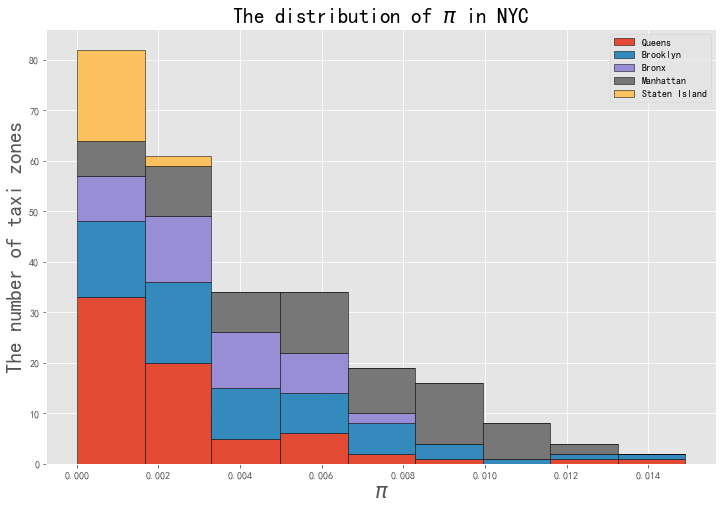

In [19]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize=(12,8))
plt.style.use('ggplot')
L_Queens=list(df[df['Borough']=='Queens']['pi'])
L_Bronx=list(df[df['Borough']=='Bronx']['pi'])
L_Manhattan=list(df[df['Borough']=='Manhattan']['pi'])
L_Brooklyn=list(df[df['Borough']=='Brooklyn']['pi'])
L_StatenIsland=list(df[df['Borough']=='Staten Island']['pi'])

x_axis=[L_Queens,L_Brooklyn,L_Bronx,L_Manhattan,L_StatenIsland]
labels=['Queens','Brooklyn','Bronx','Manhattan','Staten Island']
y_axis=np.linspace(0,0.15,10)
y_axis=[0,0.00167,0.0033,0.00498,0.00664,0.00829,0.00995,0.01160,0.01325,0.01491]
plt.hist(x_axis,bins=y_axis,histtype='bar',rwidth=10.5,stacked=True,label=labels,edgecolor='black')#,align='left')
plt.legend()

#plt.title('Distribution of $\pi$ in NYC',fontsize=21)
plt.title('The distribution of $\pi$ in NYC',fontsize=21)
plt.xlabel('$\pi$',fontsize=21)
plt.ylabel('The number of taxi zones',fontsize=21)
plt.savefig(r'the relation ship between pi and taxi departure passengers.svg',dpi=1000,format='svg')

In [16]:
df1=data_taxi.groupby('PULocationID',as_index=False).count()
df['start num']=df1['num']
df2=data_taxi.groupby('DOLocationID',as_index=False).count()
df['end num']=df2['num']
df

,LocationID,Borough,Zone,service_zone,pi,start num,end num
0,1,Queens,Jamaica Bay,Boro Zone,0.000020,24,32
1,2,Bronx,Allerton/Pelham Gardens,Boro Zone,0.002398,33871,34023
2,3,Manhattan,Alphabet City,Yellow Zone,0.002976,53660,55390
3,4,Staten Island,Arden Heights,Boro Zone,0.000287,3387,3436
4,5,Staten Island,Arrochar/Fort Wadsworth,Boro Zone,0.000569,7075,7811
...,...,...,...,...,...,...,...
255,256,Bronx,Woodlawn/Wakefield,Boro Zone,0.002752,37619,39198
256,257,Queens,Woodside,Boro Zone,0.004019,58978,61916
257,258,Manhattan,World Trade Center,Yellow Zone,0.002790,52027,50809
258,259,Manhattan,Yorkville East,Yellow Zone,0.005272,97629,95167


No handles with labels found to put in legend.


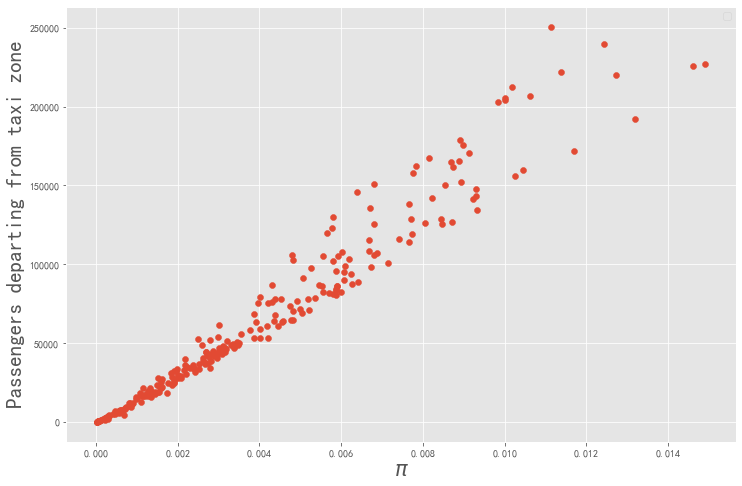

In [17]:
plt.subplots(figsize=(12,8))
plt.style.use('ggplot')

#y_axis=np.linspace(0,0.15,10)
#y_axis=[0,0.00167,0.0033,0.00498,0.00664,0.00829,0.00995,0.01160,0.01325,0.01491]
#plt.hist(x_axis,bins=y_axis,histtype='bar',rwidth=10.5,stacked=True,label=labels,edgecolor='black')#,align='left')
plt.scatter(df['pi'],df['start num'])
plt.legend()

plt.xlabel('$\pi$',fontsize=21)
plt.ylabel('Passengers departing from taxi zone',fontsize=21)
plt.savefig(r'The relation ship between departure number and pi.svg',dpi=1000,format='svg')

No handles with labels found to put in legend.


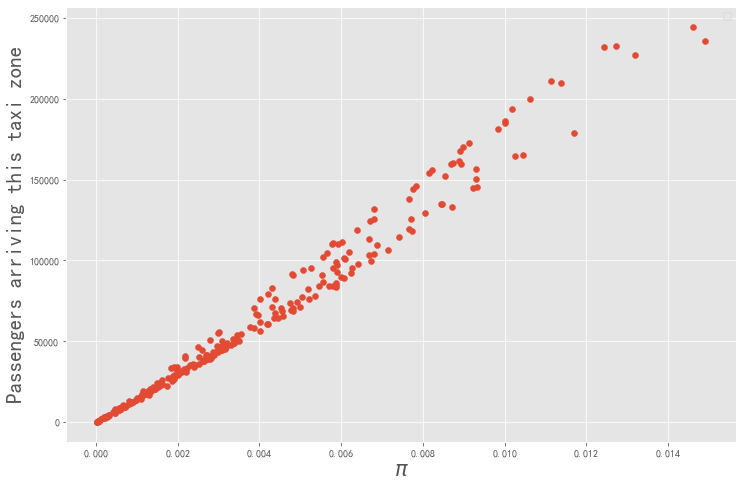

In [18]:
plt.subplots(figsize=(12,8))
plt.style.use('ggplot')

#y_axis=np.linspace(0,0.15,10)
#y_axis=[0,0.00167,0.0033,0.00498,0.00664,0.00829,0.00995,0.01160,0.01325,0.01491]
#plt.hist(x_axis,bins=y_axis,histtype='bar',rwidth=10.5,stacked=True,label=labels,edgecolor='black')#,align='left')
plt.scatter(df['pi'],df['end num'])
plt.legend()


plt.xlabel('$\pi$',fontsize=21)
plt.ylabel('Passengers arriving this taxi zone',fontsize=21)
plt.savefig(r'The relation ship between arriving number and pi.svg',dpi=1000,format='svg')